# Project background

The California Cooperative Oceanic Fisheries Investigations (CalCOFI) was formed in 1949 to study the 
ecological aspects of the sardine population collapse off California. CalCOFI conducts quarterly cruises off 
southern & central California, collecting a suite of hydrographic and biological data on station and 
underway. The CalCOFI data set represents the longest (1949-present) and most complete (more than 
50,000 sampling stations) time series of oceanographic in the world.  
The physical, chemical, and biological data collected at regular time and space intervals quickly became 
valuable for documenting climatic cycles in the California Current and a range of biological responses to 
them. Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, 
nitrate and nitrite, chlorophyll, transmissometer, PAR and C14 primary productivity. 

https://calcofi.org/data/oceanographic-data/bottle-database/


# Import Libraries  

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import parse 

# Import Data

In [61]:
bottle = pd.read_csv('bottle.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

# Initial Data management 

In [155]:
#Filling in missing values and converting NaN to '00'
bottle.fillna(00, inplace=True)
bottle.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Date,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,...,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment,Year
0,1,1,054.0 056.0,1949-03-01,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500000,33.440000,0.000000,25.649000,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1949
1,1,2,054.0 056.0,1949-03-01,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460000,33.440000,0.000000,25.656000,...,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1949
2,1,3,054.0 056.0,1949-03-01,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460000,33.437000,0.000000,25.654000,...,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1949
3,1,4,054.0 056.0,1949-03-01,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450000,33.420000,0.000000,25.643000,...,19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1949
4,1,5,054.0 056.0,1949-03-01,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450000,33.421000,0.000000,25.643000,...,20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1949


In [64]:
bottle.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000,...,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000
mean,17138.790958,432432.000000,226.831951,10.662780,31.987483,2.730883,24.246430,43.661533,113.778052,1.440341,...,0.117273,0.051730,228.395694,22.863388,4.976888,0.561552,5.436260,0.616575,0.000092,0.000768
std,10240.949817,249664.587267,316.050259,4.386508,7.711695,2.294962,6.278490,40.484311,101.018605,4.278090,...,0.647692,0.211016,319.456731,64.956928,103.543092,34.977081,110.625007,37.491744,0.027028,0.077964
min,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8269.000000,216216.500000,46.000000,7.570000,33.431000,0.400000,24.805000,3.700000,10.873220,0.000000,...,0.000000,0.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16848.000000,432432.000000,125.000000,9.990000,33.806000,2.460000,25.870790,34.000000,97.065950,0.000000,...,0.000000,0.000000,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26557.000000,648647.500000,300.000000,13.830000,34.180000,5.240000,26.615000,88.300000,225.238700,0.000000,...,0.000000,0.020000,302.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [65]:
#Count number of bottles per month. To get an idea of how many different months/years were involved in the study
bottle['Date'].value_counts(sort = False, dropna = True)

Date
1949-03    2159
1949-04    2890
1949-05    3306
1949-06    2415
1949-07    3191
           ... 
2015-11    1771
2016-01    2626
2016-04    2521
2016-07    1800
2016-11    1990
Name: count, Length: 376, dtype: int64

### Data Management for box plot

In [67]:
#Setting the date in a standard format (only by year)
bottle['Year'] = bottle['Date'].str[:4]
bottle['Year'] = pd.to_numeric(bottle['Year'])

In [68]:
#Getting data subset - Bottles from 2010-2016 as the categorical variable 
sub1 = bottle[(bottle['Year'] >= 1990) & (bottle['Year'] <= 2016)]
sub2 = sub1.copy()

In [69]:
#Creating categories of years
sub2['Year_groups'] = pd.cut(sub2.Year, [1986, 1992, 1998, 2004, 2010, 2016])                   

In [70]:
sub2['Year_groups'] = sub2['Year_groups'].astype('category')

In [71]:
sub2['Year_groups'].value_counts(sort=False, dropna=True)

Year_groups
(1986, 1992]    24129
(1992, 1998]    52750
(1998, 2004]    47533
(2004, 2010]    48978
(2010, 2016]    47678
Name: count, dtype: int64

# Task 1: Histogram

Text(0.5, 1.0, 'Temperature counts of water over time from 1949 to present\n')

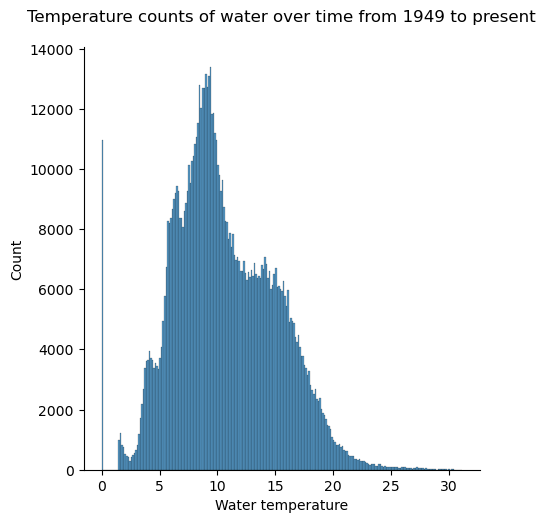

In [73]:
sns.displot(bottle["T_degC"].dropna(), kde=False); #hisplot function similarly works
plt.xlabel('Water temperature')
plt.title('Temperature counts of water over time from 1949 to present' + '\n')

#### Findings -

The histogram has a Uni-modal distribution shape.

The water temperatures of 10-15 seem to be the most frequent and without much variations between the intervals. 

The water temperature was at a high of 30 the least number of times. 

This could possibly be because of external factors such as seasonal weather conditions or the time of day the bottles are deployed.


# Task 2: Boxplot

In [75]:
# sub2['Year'] = sub2['Year'].astype('category')
sub2['R_NO3'] = pd.to_numeric(sub2['R_NO3'])

Text(0, 0.5, 'Reported Nitrate concentration')

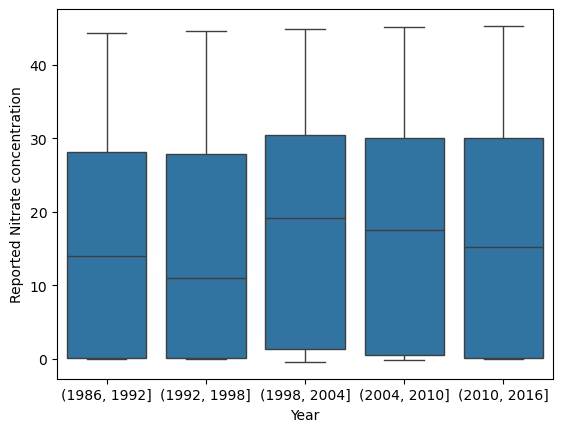

In [76]:
%matplotlib inline
sns.boxplot(x='Year_groups', y='R_NO3', data=sub2)
#sns.stripplot(x='Year_groups', y='R_NO3', data=sub2, color='black', size=2)
plt.xlabel('Year')
plt.ylabel('Reported Nitrate concentration')

In [77]:
#To check why min and max value. And why it's constant.
grouped_data = sub2.groupby('Year_groups')['R_NO3'].describe()
print(grouped_data)

                    count      mean       std       min      25%       50%  \
Year_groups                                                                  
(1986, 1992] 24129.000000 15.478171 14.320790  0.000000 0.200000 14.000000   
(1992, 1998] 52750.000000 14.598671 14.518972  0.000000 0.100000 11.000000   
(1998, 2004] 47533.000000 17.795128 14.383153 -0.400000 1.300000 19.200000   
(2004, 2010] 48978.000000 16.889124 14.501889 -0.100000 0.500000 17.600000   
(2010, 2016] 47678.000000 16.104067 14.787057  0.000000 0.100000 15.200000   

                   75%       max  
Year_groups                       
(1986, 1992] 28.200000 44.400000  
(1992, 1998] 27.900000 44.600000  
(1998, 2004] 30.500000 44.900000  
(2004, 2010] 30.100000 45.200000  
(2010, 2016] 30.000000 45.300000  


C:\Users\sunor\AppData\Local\Temp\ipykernel_9616\4258066988.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = sub2.groupby('Year_groups')['R_NO3'].describe()


#### Findings -

Each year follows a consistent pattern of values ranging from 0 to 45. No outliers, no extremely low/high Nitrate levels. 

The median values are on par throughout, although from 1998 onward, there is an increase in median Nitrate concentration values. This means half of the Nitrate concentration readings are higher than previously.  

The upper quartile has also increased, which indicates that more readings have recorded higher NO3 levels more frequently. Precisely, the top 25% of the data has increased.


# Task 3: Line chart 

In [79]:
# Drop missing values for the selected variables
bottle = bottle.dropna(subset=['R_Depth', 'R_PRES'])
Depth = bottle['R_Depth']
Pressure = bottle['R_PRES']

Text(0, 0.5, '\nPressure in decibars')

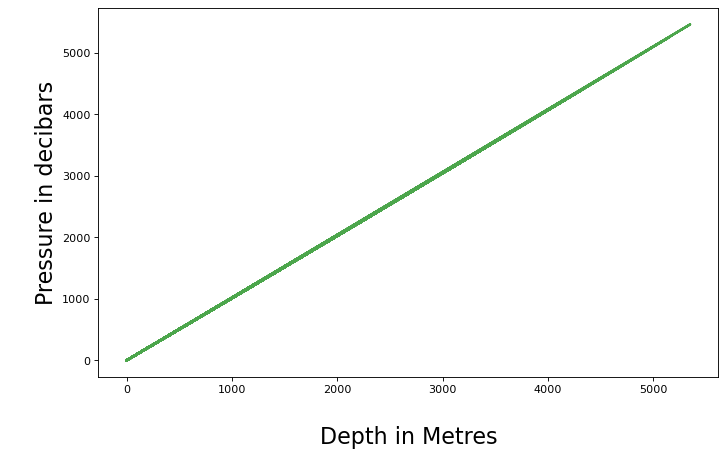

In [80]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(bottle['R_Depth'], bottle['R_PRES'], color='green', alpha=0.7, linewidth=2)

plt.xlabel('\n' + 'Depth in Metres', size=20)
plt.ylabel('\n' + 'Pressure in decibars', size=20)

### Findings -

There is a linear positive relation between sea depth and pressure levels.
The pressure increases by 1000 decibars every 1000 meters.
A straight line means there are no deviations, and the linear relation is exact.


# Task 4: Bubble chart 

In [82]:
bottle['Depthm'] = pd.to_numeric(bottle['Depthm'],errors='coerce') 
bottle['T_degC'] = pd.to_numeric(bottle['T_degC'],errors='coerce')
bottle['R_PO4'] = pd.to_numeric(bottle['R_PO4'],errors='coerce')

In [83]:
bottle_clean=bottle.dropna()

In [84]:
# Filtering the dataset to focus on a specific depth range (0 to 200 meters)
bottle_filtered = bottle_clean[(bottle_clean['Depthm'] >= 0) & (bottle_clean['Depthm'] <= 200)]

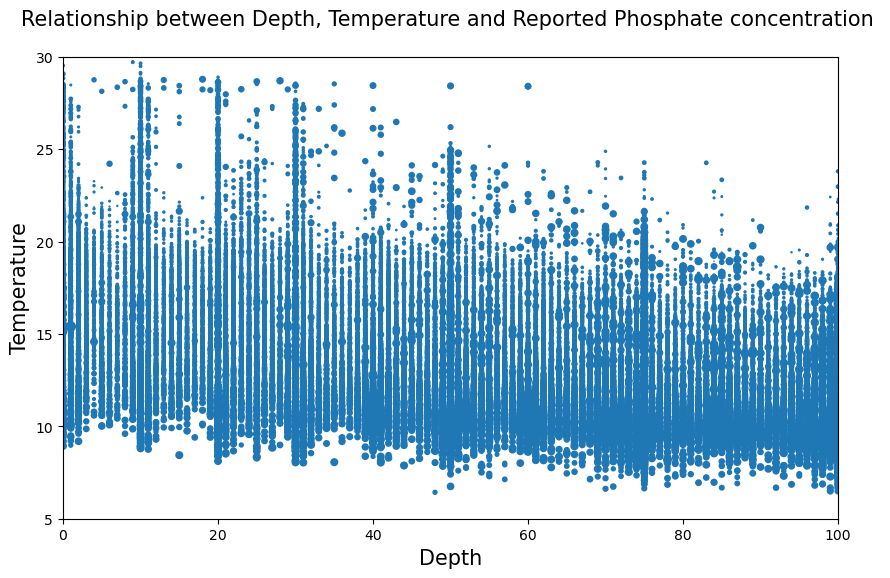

In [85]:
# x = Depth
# y = Temperature
# Third variable = Phosphate concentration
%matplotlib inline
fig = plt.figure(figsize=(10, 6))
plt.scatter(bottle_clean['Depthm'], bottle_clean['T_degC'], s=bottle_clean['R_PO4'] * 10) 
plt.title("Relationship between Depth, Temperature and Reported Phosphate concentration \n", size=15)
plt.xlabel('Depth', size=15)
plt.ylabel('Temperature', size=15)
plt.xlim(0,100)
plt.ylim(5,30)

plt.show()

### Findings

As the bottles go deeper in the ocean, it gets colder. So a higher depth and lower temperature leads to higher phosphate concentration. 

There are few outliers until 60 decibars, where temperatures are recorded slightly higher than usual despite the depth.


# Task 5: Histogram for categorical vairables

In [161]:
#Standardizing date format for conversion
bottle['Date'] = pd.to_datetime(bottle['Date'], format='%Y-%m')

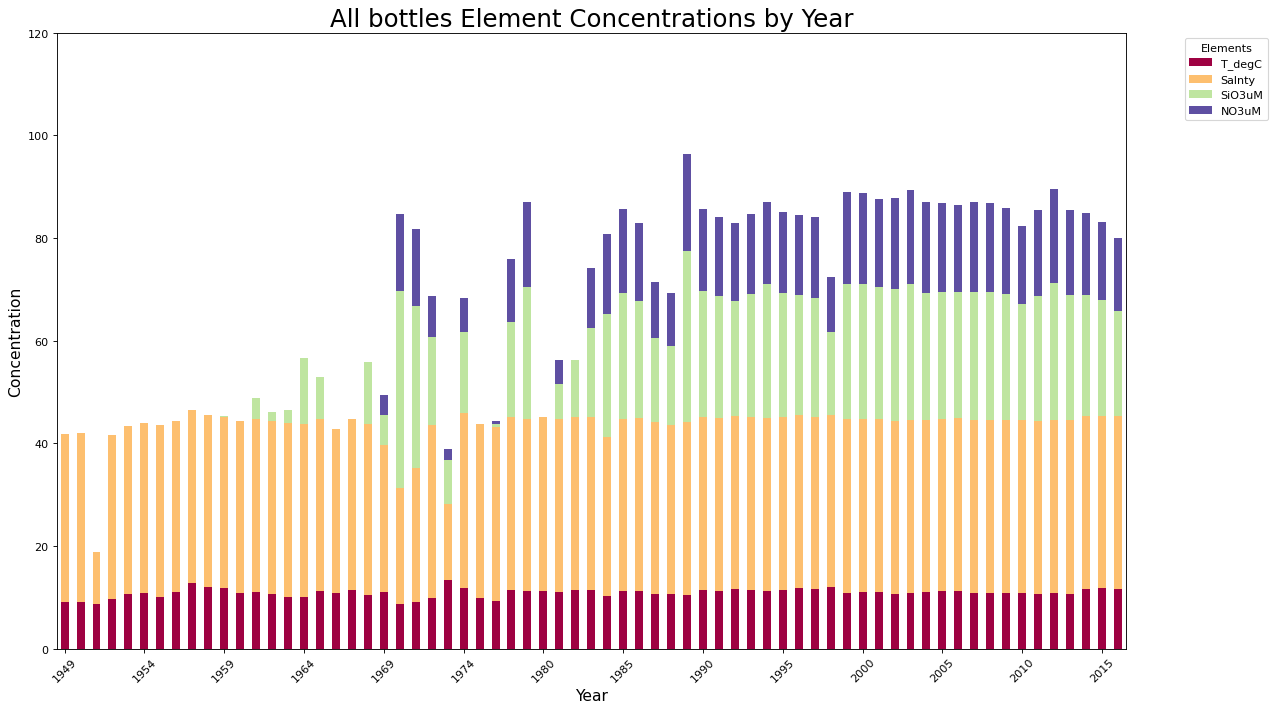

In [163]:
bottle['Year'] = bottle['Date'].dt.year

# Grouping by year and aggregating the elements
aggregated_data = bottle.groupby('Year').agg({
    'Btl_Cnt': 'sum',        # Total number of bottles
    'T_degC': 'mean',        # Average temperature
    'Salnty': 'mean',        # Average salinity
    'SiO3uM': 'mean',        # Average silicate concentration
    'NO3uM': 'mean'          # Average nitrate concentration
}).reset_index()

# Plotting the chart
plt.figure(figsize=(16,9), dpi=80)
ax = aggregated_data.set_index('Year')[['T_degC', 'Salnty', 'SiO3uM', 'NO3uM']].plot(kind='bar', stacked=True, colormap='Spectral', ax=plt.gca())

# Show every 5th year
ax.set_xticks(np.arange(0, len(aggregated_data), step=5)) 
ax.set_xticklabels(aggregated_data['Year'][::5], rotation=45)

# Y-axis limit for better scaling
ax.set_ylim(0, 120) 


plt.title('All bottles Element Concentrations by Year', fontsize=22)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Concentration', fontsize=14)


plt.legend(title='Elements', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Findings

Before 1969 there were no nitrate concentration levels. Possible implied conclusion can be that there were no existing tools during that time period to capture such data. 

Before 1961, there were little to none silicate concentration levels. 

Salinity and temperature levels are nearly constant throughout all the years, with slight variations.  

A change in overall readings per year are generally caused by silicate or nitrate concentrations. 
